In [28]:
# import packages
import datetime
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
import umap
from sklearn.pipeline import Pipeline
from mpl_toolkits.mplot3d import Axes3D 
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input, Reshape, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.constraints import UnitNorm
from tensorflow.keras.regularizers import l2, l1
from scipy.special import softmax
import warnings
warnings.filterwarnings('ignore')


# azz

In [171]:
df = pd.read_csv('faults.csv')
df.columns = map(str.lower, df.columns)
feat_col = ['x_minimum', 'x_maximum', 'y_minimum', 'y_maximum', 'pixels_areas', 'x_perimeter', 'y_perimeter', 'sum_of_luminosity', 'minimum_of_luminosity', 'maximum_of_luminosity', 'length_of_conveyer', 'typeofsteel_a300', 'typeofsteel_a400', 'steel_plate_thickness', 'edges_index', 'empty_index', 'square_index', 'outside_x_index', 'edges_x_index', 'edges_y_index', 'outside_global_index', 'logofareas', 'log_x_index', 'log_y_index', 'orientation_index', 'luminosity_index', 'sigmoidofareas']
target_cols = ['pastry', 'z_scratch', 'k_scatch', 'stains', 'dirtiness', 'bumps', 'other_faults']
enc_dict = {'pastry' : 0,
            'z_scratch' : 1,
            'k_scatch' : 2,
            'stains' : 3,
            'dirtiness' : 4,
            'bumps' : 5,
            'other_faults' : 6}
df['anomaly'] = pd.from_dummies(df[target_cols]).replace(enc_dict)
sm = SMOTE()
X = df[feat_col]
y = df['anomaly']
X_res, y_res = sm.fit_resample(X, y)
df_res = pd.merge(pd.DataFrame(X_res), pd.DataFrame(y_res), right_index = True, left_index = True)
df_nonbin = df_res.drop(['typeofsteel_a300', 'typeofsteel_a400', 'outside_global_index', 'anomaly'], axis = 1)#.drop(target_cols, axis = 1)
sc = StandardScaler()
nonbin_norm = sc.fit_transform(df_nonbin)
df_nonbin_norm = pd.DataFrame(nonbin_norm, columns = df_nonbin.columns)
df_norm = df_nonbin_norm.copy()
df_norm[['typeofsteel_a300', 'typeofsteel_a400', 'outside_global_index', 'anomaly']] = df_res[['typeofsteel_a300', 'typeofsteel_a400', 'outside_global_index', 'anomaly']]
df_norm['aggregate1'] = df_norm[['y_minimum', 'y_maximum']].mean(axis = 1)
df_norm.drop(['y_minimum', 'y_maximum'], axis = 1, inplace = True)
df_norm['aggregate2'] = df_norm[['x_minimum', 'x_maximum']].mean(axis = 1)
df_norm.drop(['x_minimum', 'x_maximum'], axis = 1, inplace = True)
df_norm['aggregate3'] = df_norm[['x_perimeter', 'pixels_areas']].mean(axis = 1)
df_norm['aggregate4'] = df_norm[['y_perimeter', 'x_perimeter']].mean(axis = 1)
df_norm.drop(['y_perimeter'], axis = 1, inplace = True)
df_norm['aggregate5'] = df_norm[['sum_of_luminosity', 'pixels_areas']].mean(axis = 1)
df_norm.drop(['pixels_areas'], axis = 1, inplace = True)
df_norm['aggregate6'] = df_norm[['sum_of_luminosity', 'x_perimeter']].mean(axis = 1)
df_norm.drop(['sum_of_luminosity',hidden_representation.add(autoencoder.layers[2]) 'x_perimeter'], axis = 1, inplace = True)
df_norm.dropna(inplace = True)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3513200146.py, line 34)

In [17]:
X = df_norm.drop('anomaly', axis = 1)
y = df_norm['anomaly']
y = tf.keras.utils.to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [18]:
# Define the autoencoder architecture
input_dim = X_train.shape[1]
encoding_dim = 10

# Define the Functional API model
inputs = Input(shape=(input_dim,))
x = Dense(128, activation='relu', kernel_constraint=UnitNorm(axis=0), kernel_regularizer=l2(0.01))(inputs)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
x = Dense(64, activation='relu', kernel_constraint=UnitNorm(axis=0), kernel_regularizer=l2(0.01))(x)
x = Dropout(0.2)(x)
bottleneck = Dense(encoding_dim, activation='relu', name='bottleneck')(x)
x = Dropout(0.2)(bottleneck)
x = Dense(64, activation='relu', kernel_constraint=UnitNorm(axis=1), kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu', kernel_constraint=UnitNorm(axis=1), kernel_regularizer=l2(0.01))(x)
outputs = Dense(input_dim, activation='relu')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='mse')

# Extract the encoder
encoder = Model(inputs, bottleneck)

model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,251 (98.64 KB)

 Trainable params: 24,867 (97.14 KB)

 Non-trainable params: 384 (1.50 KB)

In [19]:
# Train the autoencoder
model.fit(X_train, X_train, epochs = 100, batch_size = 32, shuffle = True, validation_data = (X_test, X_test), verbose = 0)

In [20]:
# Use encoder part of the autoencoder for feature selection
encoder = Model(inputs = model.input, outputs = model.get_layer('bottleneck').output)
encoded_features_train = encoder.predict(X_train)
encoded_features_test = encoder.predict(X_test)
encoded_features_train = sc.fit_transform(encoded_features_train)
encoded_features_test = sc.fit_transform(encoded_features_test)

# Display the shape of extracted features
print("Encoded Features Shape (Train):", encoded_features_train.shape)
print("Encoded Features Shape (Test):", encoded_features_test.shape)

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Encoded Features Shape (Train): (3768, 10)
Encoded Features Shape (Test): (943, 10)


In [21]:
y_train = np.argmax(y_train, axis = 1)
y_test = np.argmax(y_test, axis = 1)

# Initialize the SVM classifier
svm_classifier = SVC(kernel = 'rbf', random_state = 42)

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)
grid.fit(encoded_features_train, y_train)
y_pred = grid.predict(encoded_features_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [22]:
grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [23]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7953340402969247


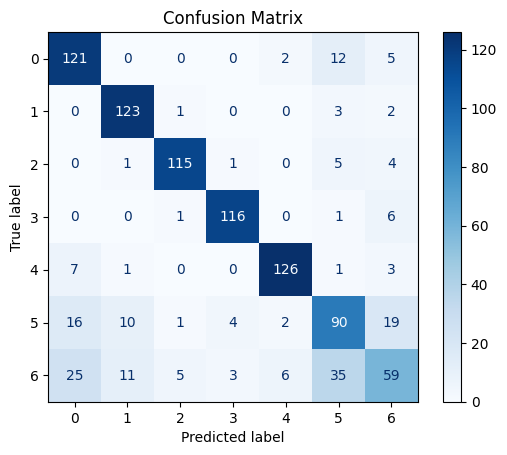

In [24]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = grid.classes_)
disp.plot(cmap = plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

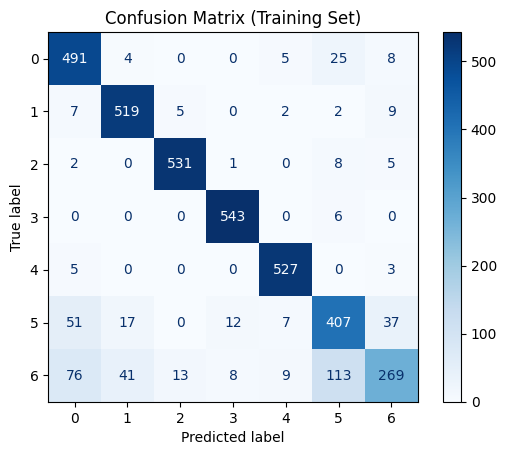

In [25]:
# Predict on the training set
y_train_pred = grid.predict(encoded_features_train)

# Compute the confusion matrix for the training set
cm_train = confusion_matrix(y_train, y_train_pred)

# Plot the confusion matrix for the training set
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=grid.classes_)
disp_train.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Training Set)")
plt.show()

In [26]:
print("Accuracy:", accuracy_score(y_train, y_train_pred))

Accuracy: 0.8723460721868365


# DAJE

In [172]:
X = df_norm.drop('anomaly', axis = 1)
y = df_norm['anomaly']

In [173]:
## input layer 
input_layer = Input(shape=(X.shape[1],))

## encoding part
encoded = Dense(256, activation='relu', activity_regularizer=l1(10e-5))(input_layer)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)

## decoding part
encoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)

## output layer
output_layer = Dense(X.shape[1], activation='relu')(decoded)

In [174]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adam", loss="mse")

In [175]:
df_norm = df_norm[df_norm['anomaly'] >= 5]

In [176]:
#y = tf.keras.utils.to_categorical(y)

x_5, x_6 = X[y == 5], X[y == 6]

In [177]:
history = autoencoder.fit(x_5[0:200], x_5[0:200], 
                batch_size = 256, epochs = 500, 
                shuffle = True, validation_split = 0.20)

Epoch 1/500


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.2242 - val_loss: 0.7727
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 1.1836 - val_loss: 0.7524
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 1.1485 - val_loss: 0.7326
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 1.1149 - val_loss: 0.7118
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 1.0810 - val_loss: 0.6890
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 1.0462 - val_loss: 0.6641
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 1.0108 - val_loss: 0.6374
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.9754 - val_loss: 0.6098
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.9408 - val_loss: 0.5822
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.9075 - val_loss: 0.5565
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.8763 - val_loss: 0.5345
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.8484 - val_loss: 0.5173
E

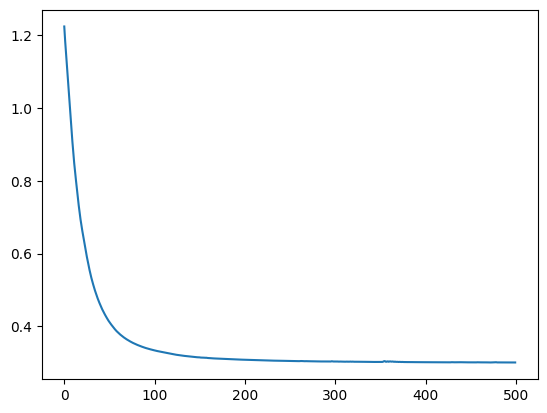

In [178]:
plt.plot(history.history['loss'])

In [179]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])
hidden_representation.add(autoencoder.layers[3])

In [180]:
cinque_hid_rep = hidden_representation.predict(x_5[:473])
sei_hid_rep = hidden_representation.predict(x_6)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [181]:
rep_x = np.append(cinque_hid_rep, sei_hid_rep, axis = 0)
y_n = np.zeros(cinque_hid_rep.shape[0])
y_n[y_n == 0] = 5
y_f = np.ones(sei_hid_rep.shape[0])
y_f[y_f == 1] = 6
rep_y = np.append(y_n, y_f)

In [182]:
tsne = TSNE(n_components = 3, random_state = 2)

df_tsne = tsne.fit_transform(rep_x)
df_tsne = pd.DataFrame(df_tsne, columns = ['PC1', 'PC2', 'PC3'])
df_tsne['anomaly'] = rep_y

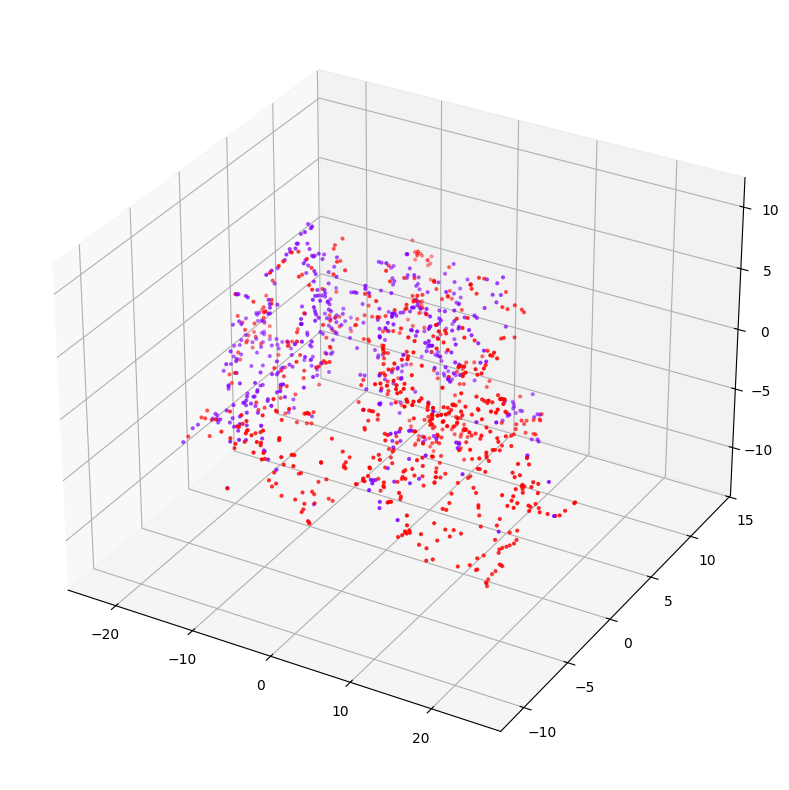

In [183]:
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(projection = '3d')
cmap = ListedColormap(sns.color_palette('rainbow', 256).as_hex())

ax.scatter(df_tsne['PC1'], df_tsne['PC2'], df_tsne['PC3'], c = df_tsne['anomaly'], s = 4, cmap = cmap)


plt.show()

In [185]:
rep_y = pd.DataFrame(rep_y)
rep_x = pd.DataFrame(rep_x)

In [187]:
X_train, X_test, y_train, y_test = train_test_split(rep_x, rep_y, test_size = 0.3, random_state = 2)

parameters = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

svc = SVC()

clf = GridSearchCV(svc, parameters, scoring = 'accuracy', refit = True, verbose = 1)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=1)

In [188]:
y_pred = clf.predict(X_test)

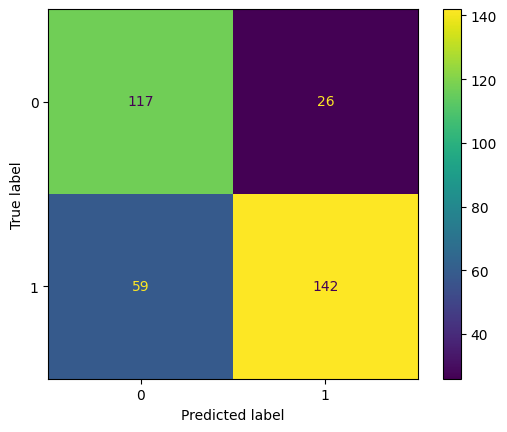

In [189]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [190]:
svm_accuracy = round(accuracy_score(y_test, y_pred), 2)
print(f'Accuracy score for SVM: {svm_accuracy}%')

Accuracy score for SVM: 0.75%
